# Predicting heart disease using machine learning

this notebook look into using various Python-based machine learning and data science libraries in an attempt
to build mahchine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Plan: 
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given critical parameters about a patient, can we predict wheter or not they have heart disease ?


## 2.Data
Heart Disease Data Set from UCI data repository
** https://archive.ics.uci.edu/dataset/45/heart+disease**

## 3. Evaluation
> If we can reach 95% at predicting whether or not a patient has heart disease during the proof of concept,we will pursue the project.

## 4. Features
 ** create data dictionary **

1. age - age in years
2. sex - (1 = male; 0 = female)
3. chest pain type
    * 0 : Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is  typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
      - can range from mild symptoms to severe problems
      - signals non-normal heart beat
    *2: Possible or definite left ventricular hypertrophy
      - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


# regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Models from Scikit-Learn
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
##load data
df = pd.read_csv("heart-disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### The goal here is to find out more the data
1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how we deal with it ?
4. Where are the outliers and why should we care about them ?
5. How can we add/change or remove features to get out more iof data ? 

In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

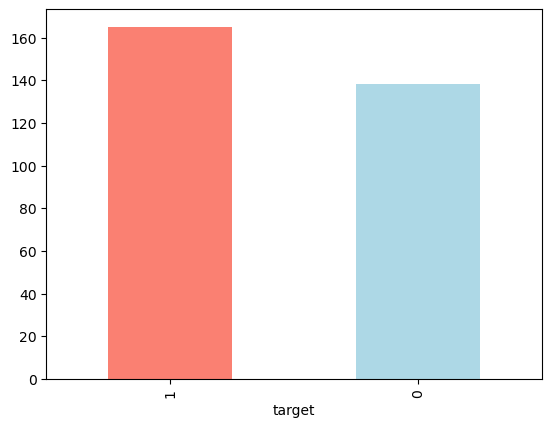

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


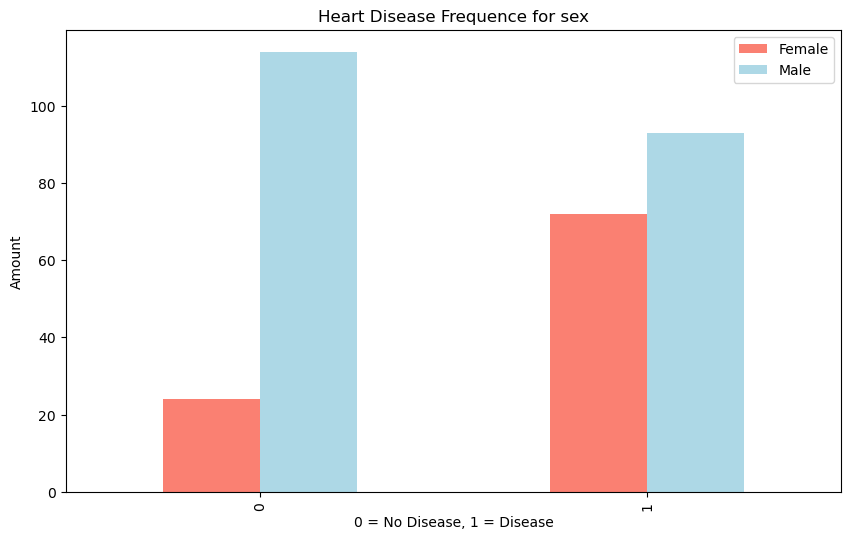

In [10]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequence for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])

In [11]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

# Age vs MaxHeart Rate for Heart Disease

Text(0, 0.5, 'Max Heart Rate')

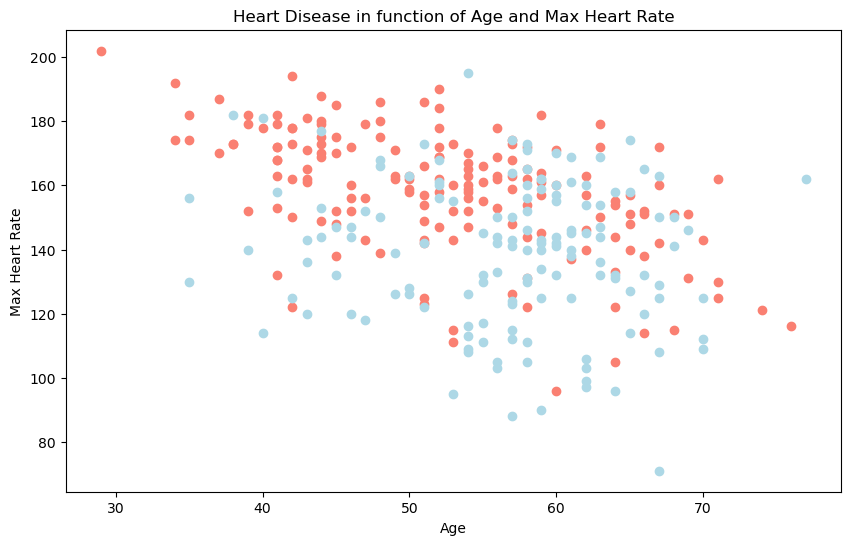

In [12]:
#create another figure

plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target == 1],c="salmon")

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target == 0],c="lightblue")

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

<Axes: ylabel='Frequency'>

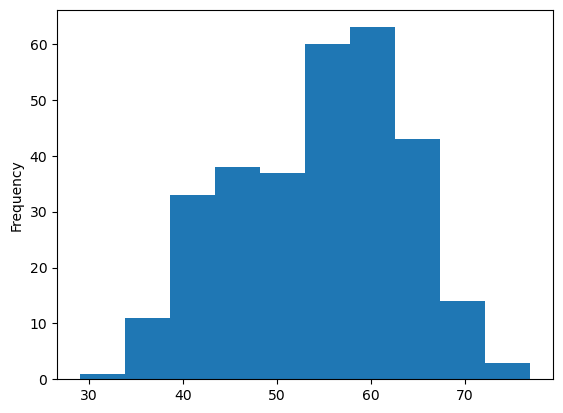

In [13]:
# Check the distribution of the age outliers!
df.age.plot.hist()

In [14]:
### heart disease frequency per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


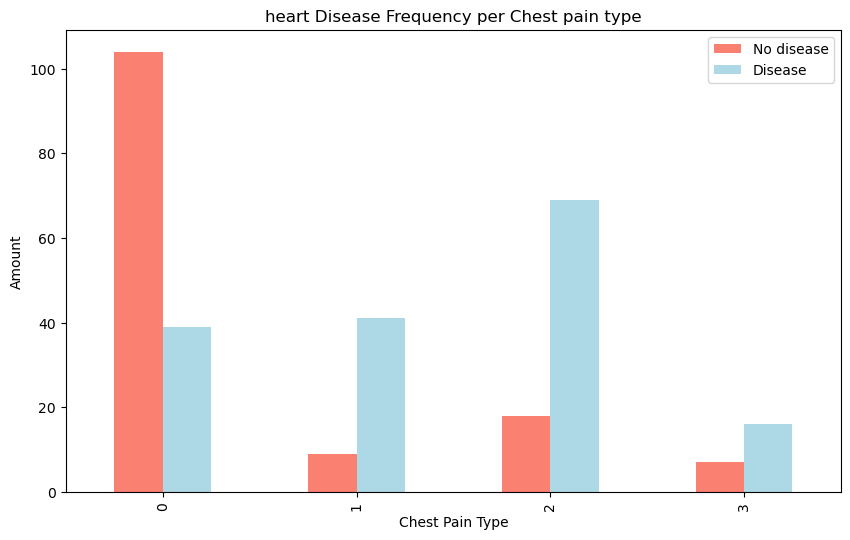

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart Disease Frequency per Chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


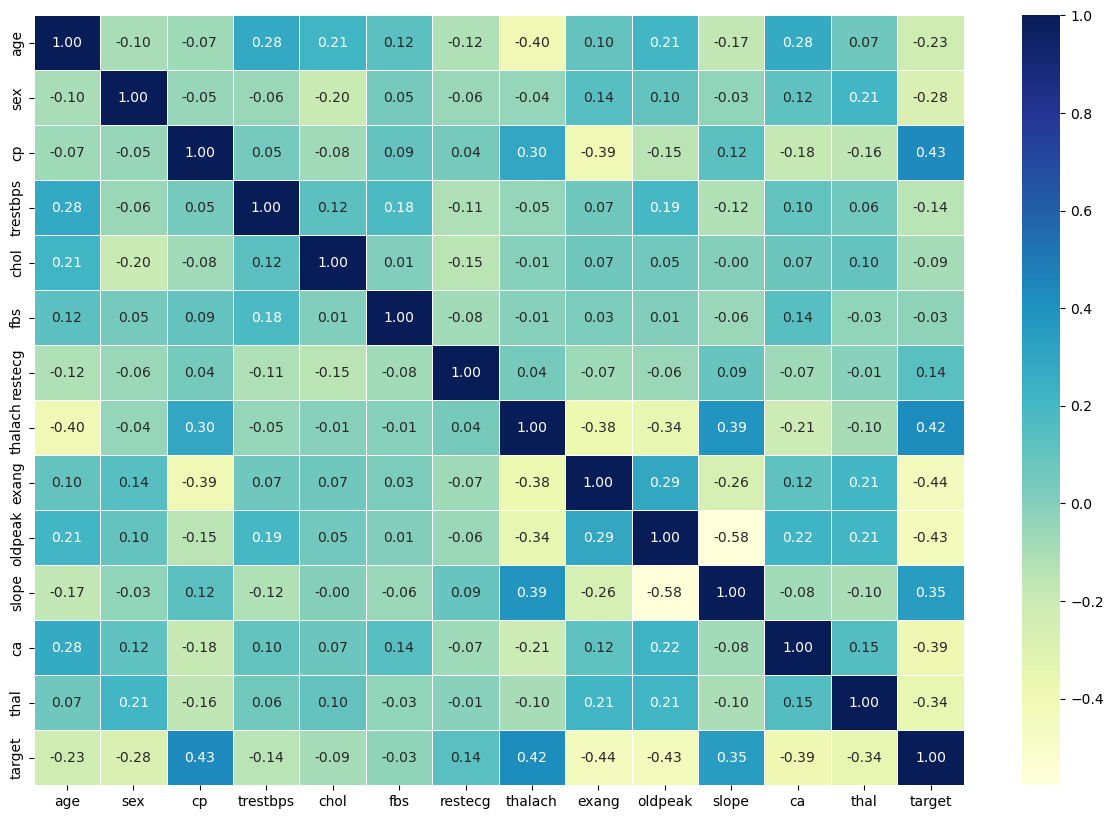

In [18]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [19]:
# Model driven EDA
X = df.drop("target",axis=1)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2


# We are going to try 3 models
 - Logistic Regression
- KNearest Neighbors
- Random Forest Classifider

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    """
    np.random.seed(42)
    #Make a list to keep model scores
    model_scores={}
    for name,model in models.items():
        #fit model to the data
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\vudar\miniconda3\envs\ml_project\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8032786885245902}

<Axes: >

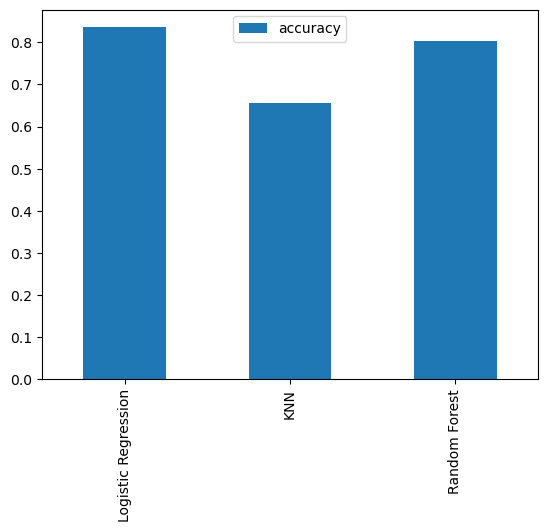

In [23]:
# Model Comparison

model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

## hyperparameter tuning KNN

In [24]:
train_scores = []
test_scores = []

#create a list of different values for n_neighbours
neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [25]:
train_scores

[1.0,
 0.7975206611570248,
 0.7768595041322314,
 0.7727272727272727,
 0.7768595041322314,
 0.7520661157024794,
 0.731404958677686,
 0.743801652892562,
 0.7066115702479339,
 0.6942148760330579,
 0.6942148760330579,
 0.6900826446280992,
 0.6818181818181818,
 0.6694214876033058,
 0.6942148760330579,
 0.6859504132231405,
 0.6818181818181818,
 0.7024793388429752,
 0.6859504132231405,
 0.6776859504132231]

In [26]:
test_scores

[0.6065573770491803,
 0.47540983606557374,
 0.6229508196721312,
 0.5737704918032787,
 0.6557377049180327,
 0.6557377049180327,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6065573770491803,
 0.6721311475409836,
 0.6065573770491803,
 0.6721311475409836,
 0.6065573770491803,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6065573770491803,
 0.6557377049180327,
 0.639344262295082]

Maximum KNN score on the test data 70.49%


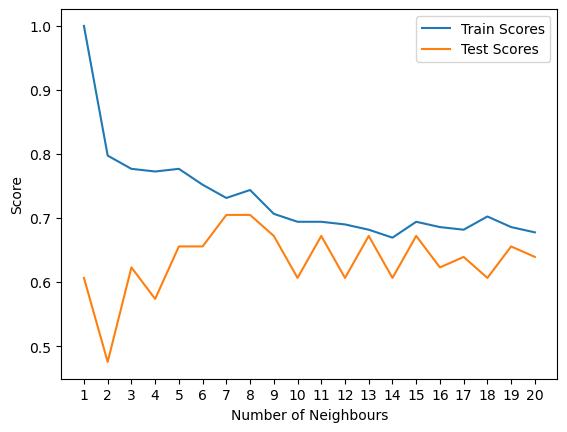

In [27]:
plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Score")
plt.legend()
print(f"Maximum KNN score on the test data {max(test_scores)*100:.2f}%")

In [28]:
##Hyperparameter for Logistic Regression and RangoForest with RandomSearchCV
#Create hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"],
}

#create hyperparameter gfrid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [29]:
#Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomSearch
np.random.seed(42)

#Steup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
                               cv=5,
    n_iter=20,
    verbose=True
)
#Fit random hyperparametr search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [31]:
rs_log_reg.score(X_test,y_test)

0.8360655737704918

In [32]:
#Now we tune RandomForest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions=rf_grid,
                                  cv=5,
                                  n_iter=20,
                                   verbose=True)

#Fit random hyperparameter search model for RandomClassiufier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
#find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 4,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [34]:
#evaluate the randomized searcxh RandomForestClassifider model
rs_rf.score(X_test,y_test)

0.8032786885245902

# Grid Search


In [35]:
#Different hyperparameters for our Logistic Regression model
log_reg_grid = {
    "C": np.logspace(-4,4,30),
    "solver":["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
#Fit
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(X_test,y_test)

0.8524590163934426

In [38]:
#Evaluating our tuned model machine learning classifier!
# make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

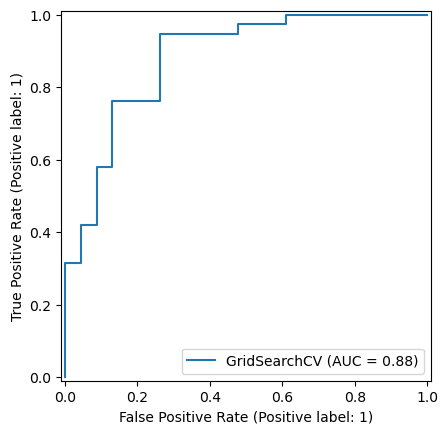

In [39]:
#Import ROC curve function form sklearn, plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [40]:
#COnfusion matrix

print(confusion_matrix(y_test,y_preds))

[[17  6]
 [ 3 35]]


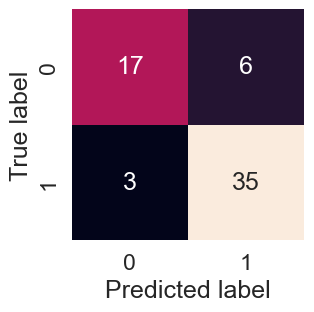

In [41]:

import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [42]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.85      0.92      0.89        38

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61



# Calculate evaluation metrics using cross-validation

In [43]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [44]:
#Check best hyperparameters
clf = LogisticRegression(C=0.1082636733874054,solver="liblinear")

In [45]:
#cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.834808743169399

In [46]:
#cross-vaslidates precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision.mean()

0.8182683982683983

In [47]:
#cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall.mean()

0.9030303030303031

In [48]:
#cross-validated f1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1.mean()

0.8572876223964055

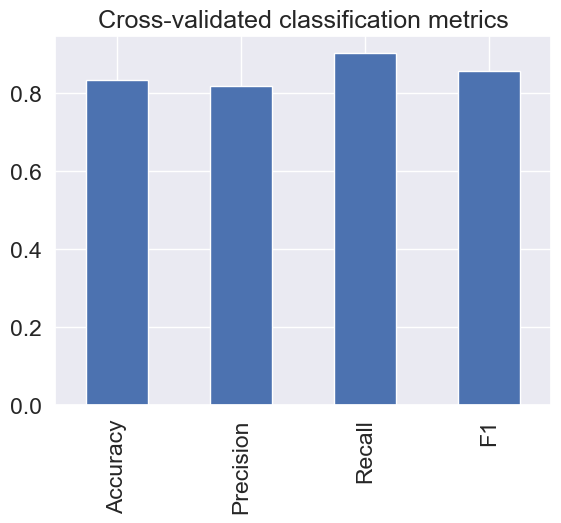

In [49]:
#visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc.mean(),
                           "Precision": cv_precision.mean(),
                           "Recall": cv_recall.mean(),
                           "F1": cv_f1.mean()},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [52]:
## feature Importance for logistic Regression Model

#Fit an instance of Logistic Regression

gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [53]:
clf = LogisticRegression(C=0.38566204211634725,solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
#Check coefficient
clf.coef_

array([[ 0.00265829, -1.07636869,  0.797863  , -0.01032286, -0.00451927,
        -0.10008414,  0.04854445,  0.03035067, -0.67938096, -0.47657709,
         0.40903432, -0.73809072, -0.69140224]])

In [61]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.002658286217138503,
 'sex': -1.0763686869602236,
 'cp': 0.797863001724843,
 'trestbps': -0.010322856657372323,
 'chol': -0.004519267673847417,
 'fbs': -0.10008414312280384,
 'restecg': 0.04854444864168758,
 'thalach': 0.030350665447654652,
 'exang': -0.6793809629156619,
 'oldpeak': -0.4765770859469177,
 'slope': 0.4090343176514901,
 'ca': -0.7380907157347711,
 'thal': -0.691402240681694}

<Axes: title={'center': 'Ferature importtance'}>

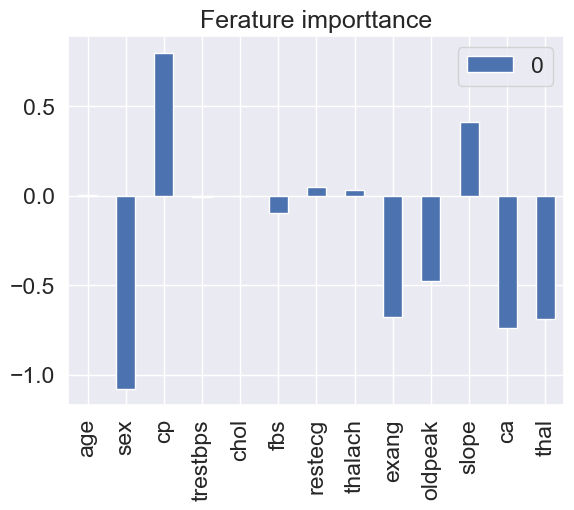

In [66]:
#visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Ferature importtance")

In [63]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [64]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6.Experimentation
 -Could you collect more data?
  - could you try a better model ? like a Catboosty oir XGBoost?
  - 